Edward Biswas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn import tree
import graphviz
from graphviz import Source

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
data = pd.read_csv('StockX-Data-Contest-2019-3.csv', encoding='utf-8')

In [4]:
# Converting object into int
data['Sale Price'] = data['Sale Price'].astype(str).str.replace('$','').str.replace(',', '').astype(int)
data['Retail Price'] = data['Retail Price'].astype(str).str.replace('$','').str.replace(',', '').astype(int)

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Release Date'] = pd.to_datetime(data['Release Date'], dayfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null int64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 6.1+ MB


In [7]:
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island


# Distribution Plots

In [8]:
groupby_state = data.groupby('Buyer Region')

Text(0, 0.5, 'Amount of Sneakers Sold')

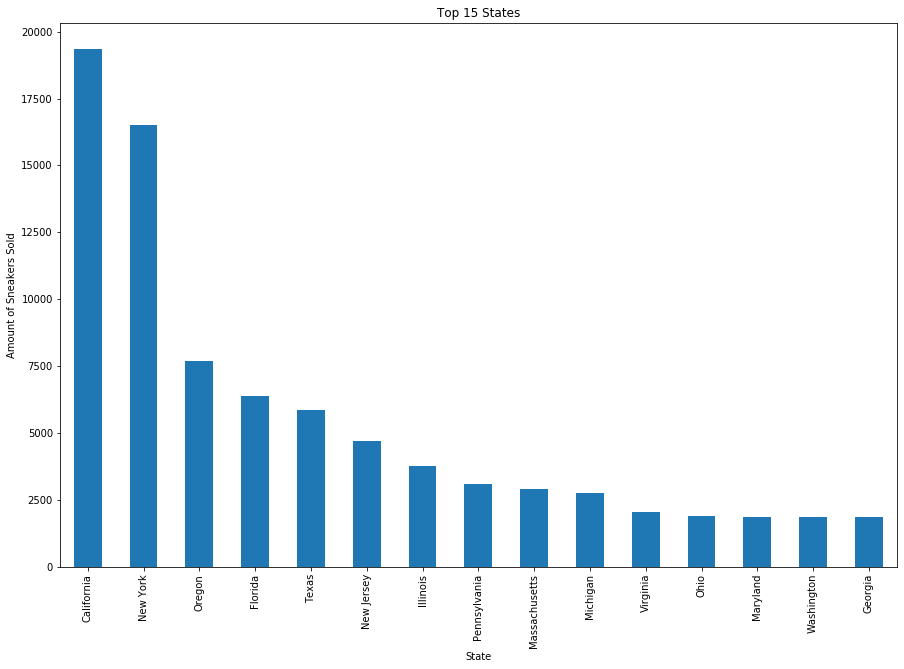

In [9]:
groupby_state_size = groupby_state.size()
groupby_state_size.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 States')
plt.xlabel('State')
plt.ylabel('Amount of Sneakers Sold')

In [10]:
groupby_popular_brand = data.groupby('Brand').size()
groupby_popular_brand

Brand
 Yeezy       72162
Off-White    27794
dtype: int64

Text(0, 0.5, 'Amount of Sneakers Sold')

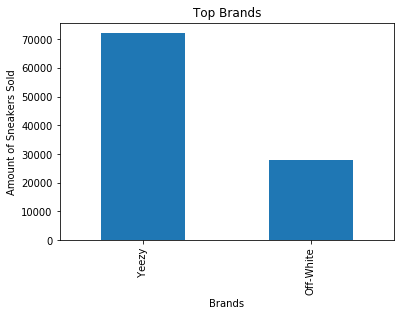

In [11]:
groupby_popular_brand.plot.bar()
plt.title('Top Brands')
plt.xlabel('Brands')
plt.ylabel('Amount of Sneakers Sold')

In [56]:
groupby_popular_sneaker = data.groupby('Sneaker Name').size()

Text(0, 0.5, 'Amount of Sneakers Sold')

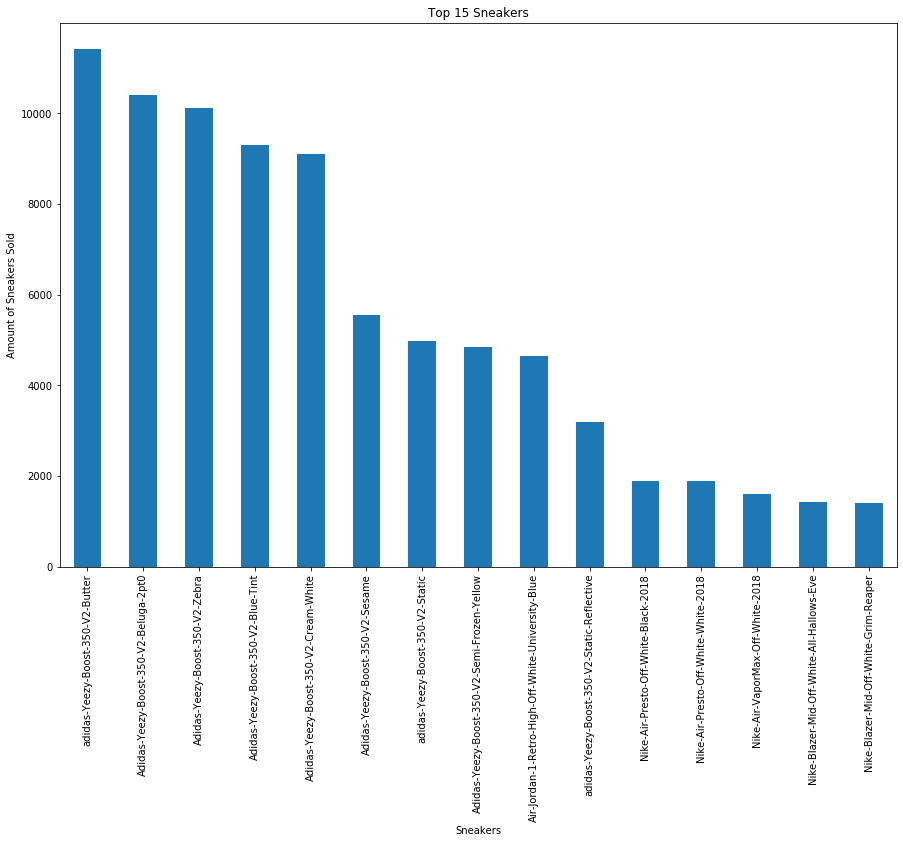

In [13]:
groupby_popular_sneaker.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 Sneakers')
plt.xlabel('Sneakers')
plt.ylabel('Amount of Sneakers Sold')

In [14]:
groupby_popular_size = data.groupby('Shoe Size').size()

Text(0, 0.5, 'Amount of Sneakers Sold')

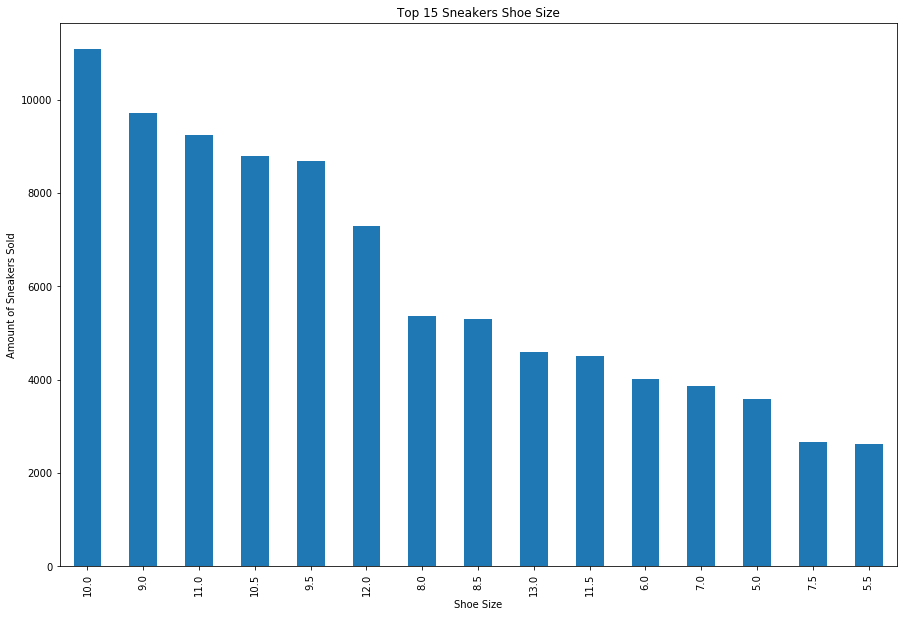

In [15]:
groupby_popular_size.nlargest(15).plot.bar(figsize=(15,10))
plt.title('Top 15 Sneakers Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Amount of Sneakers Sold')

# Relationship Plots

In [16]:
data['Profit'] = data['Sale Price'] - data['Retail Price']
data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
0,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-01-09,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-11-02,11.0,Rhode Island,608


Text(0.5, 1.0, 'Sale Price vs Retail Price')

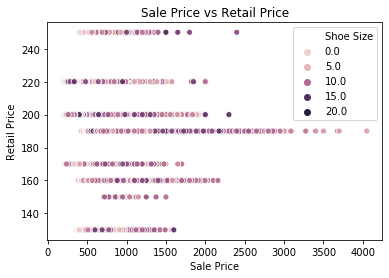

In [17]:
sns.scatterplot(data=data, x='Sale Price', y='Retail Price', hue='Shoe Size').set_title('Sale Price vs Retail Price')

Text(0.5, 1.0, 'Shoe Size vs Profit')

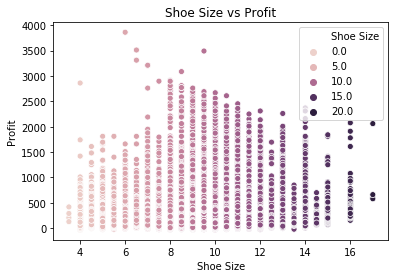

In [18]:
sns.scatterplot(data=data, x='Shoe Size', y='Profit', hue='Shoe Size').set_title('Shoe Size vs Profit')

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Month'] = data['Order Date'].dt.month

Text(0.5, 1.0, 'Order Month vs Sale Price')

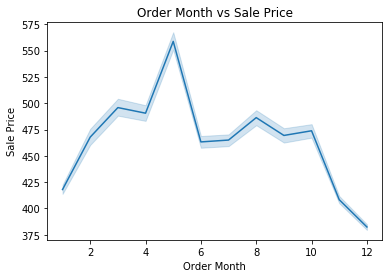

In [20]:
sns.lineplot(data=data, x='Order Month', y='Sale Price').set_title('Order Month vs Sale Price')

In [21]:
may_filter = data["Order Date"].dt.month == 12
data[may_filter]["Sale Price"].mean()

382.3814021476359

# Linear Regression Model

In [47]:
dummy = pd.get_dummies(data=data, columns=['Sneaker Name'], drop_first=True)
dummy.head()

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Order Month,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,...,Sneaker Name_Nike-Blazer-Mid-Off-White-Wolf-Grey,Sneaker Name_Nike-React-Hyperdunk-2017-Flyknit-Off-White,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Black,Sneaker Name_Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Sneaker Name_Nike-Zoom-Fly-Off-White,Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver,Sneaker Name_Nike-Zoom-Fly-Off-White-Pink,Sneaker Name_adidas-Yeezy-Boost-350-V2-Butter,Sneaker Name_adidas-Yeezy-Boost-350-V2-Static,Sneaker Name_adidas-Yeezy-Boost-350-V2-Static-Reflective
0,2017-01-09,Yeezy,1097,220,2016-09-24,11.0,California,877,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-09,Yeezy,685,220,2016-11-23,11.0,California,465,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-09,Yeezy,690,220,2016-11-23,11.0,California,470,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-09,Yeezy,1075,220,2016-11-23,11.5,Kentucky,855,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-09,Yeezy,828,220,2017-11-02,11.0,Rhode Island,608,1,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
data.groupby('Sneaker Name')['Sale Price'].mean().nlargest(5)

Sneaker Name
Air-Jordan-1-Retro-High-Off-White-White      1826.070288
Air-Jordan-1-Retro-High-Off-White-Chicago    1769.800000
Adidas-Yeezy-Boost-350-Low-Turtledove        1531.661765
Nike-Air-Presto-Off-White                    1236.055369
Adidas-Yeezy-Boost-350-Low-Oxford-Tan        1011.514286
Name: Sale Price, dtype: float64

In [102]:
lm = smf.ols("Q('Sale Price') ~ Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White') + \
                            Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago') + \
                            Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove') + \
                            Q('Sneaker Name_Nike-Air-Presto-Off-White') + \
                            Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan')", 
             data=dummy).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Sale Price')   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 1.181e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:19:25   Log-Likelihood:            -6.7290e+05
No. Observations:               99956   AIC:                         1.346e+06
Df Residuals:                   99950   BIC:                         1.346e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     426.1101      0.648    657.758      0.000     424.840     427.380
Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White')    1399.9602     11.490    121.839      0.000    1377.439    1422.481
Q('Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago')  1343.6899      7.415    181.217      0.000    1329.157    1358.223
Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove')      1105.5516     24.621     44.903      0.000    1057.295    1153.808
Q('Sneaker Name_Nike-Air-Presto-Off-White')                   809.9452      8.339     97.130      0.000     793.601     826.289
Q('Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan')       585.4042     24.267     24.123      0.000     537.841     632.967
==============================================================================
Omnibus:                    31189.532   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109185.413
Skew:                           1.565   Prob(JB):                         0.00
Kurtosis:                       7.052   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 426.11 - 1399.96x1 + 1343.69x2 + 1105.55x3 + 809.95x4 + 585.40x5

In [128]:
errors = dummy["Sale Price"] - lm.fittedvalues
square_errors = errors**2
square_errors.mean()

41190.1535857273

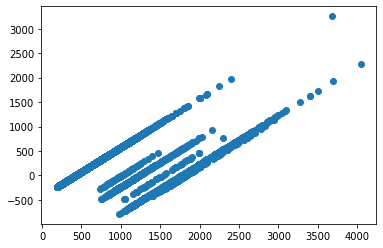

In [104]:
plt.scatter(x=dummy['Sale Price'], y=lm.resid)

# Decision Tree

In [117]:
X = dummy.loc[:,['Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White',
                 'Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago',
                 'Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove',
                 'Sneaker Name_Nike-Air-Presto-Off-White',
                 'Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan']]
X.head()

,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Nike-Air-Presto-Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy["Sale Price"], test_size=0.2)

In [118]:
reg_train = tree.DecisionTreeRegressor(max_depth=5)
reg_train = reg_train.fit(X_train, y_train)

In [120]:
print(tree.export_graphviz(reg_train)
      .replace('X[0]', 'AJ1-OW-White')
      .replace('X[1]', 'AJ1-OW-Chicago')
      .replace('X[2]', 'YZY-350-TD')
      .replace('X[3]', 'Nike Air Presto OW')
      .replace('X[4]', 'YZY-350-Oxford'))

digraph Tree {
node [shape=box] ;
0 [label="AJ1-OW-Chicago <= 0.5\nmse = 65471.967\nsamples = 79964\nvalue = 446.751"] ;
1 [label="AJ1-OW-White <= 0.5\nmse = 50754.802\nsamples = 79379\nvalue = 436.908"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Nike Air Presto OW <= 0.5\nmse = 44438.726\nsamples = 79124\nvalue = 432.428"] ;
1 -> 2 ;
3 [label="YZY-350-TD <= 0.5\nmse = 40395.389\nsamples = 78658\nvalue = 427.71"] ;
2 -> 3 ;
4 [label="YZY-350-Oxford <= 0.5\nmse = 39481.989\nsamples = 78602\nvalue = 426.914"] ;
3 -> 4 ;
5 [label="mse = 39290.178\nsamples = 78551\nvalue = 426.549"] ;
4 -> 5 ;
6 [label="mse = 18170.916\nsamples = 51\nvalue = 989.529"] ;
4 -> 6 ;
7 [label="mse = 76015.938\nsamples = 56\nvalue = 1543.75"] ;
3 -> 7 ;
8 [label="mse = 88873.814\nsamples = 466\nvalue = 1228.856"] ;
2 -> 8 ;
9 [label="mse = 71551.089\nsamples = 255\nvalue = 1827.157"] ;
1 -> 9 ;
10 [label="mse = 265591.174\nsamples = 585\nvalue = 1782.309"] ;
0 -> 10 [labeldistance=

In [108]:
predictions = reg_train.predict(X_test)
((y_test - predictions)**2).mean()

42420.509549390175

# k-nearest neighbors

In [129]:
y = dummy['Sale Price']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [131]:
k3nn = KNeighborsClassifier(n_neighbors=3)
k3nn.fit(X_train, y_train)
y_pred = k3nn.predict(X_test)

In [132]:
((y_pred - y_test)**2).mean()

65456.785214085634

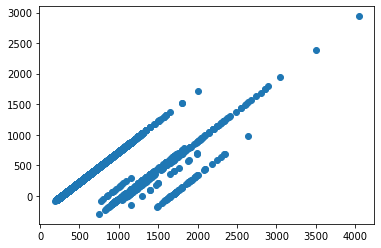

In [133]:
plt.scatter(y_test, y_test - y_pred)

# Cross Tabulation

In [43]:
pd.crosstab(data["Buyer Region"], data['Brand'], margins=True)

Brand,Yeezy,Off-White,All
Buyer Region,,,
Alabama,375,82,457
Alaska,41,20,61
Arizona,1005,393,1398
Arkansas,141,32,173
California,13113,6236,19349
Colorado,702,252,954
Connecticut,844,266,1110
Delaware,818,424,1242
District of Columbia,190,81,271
